In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Read a GrayScale Image

In [62]:
# Read the grayscale image
image = cv2.imread('/content/pexels-jan-kroon-1169107.jpg', cv2.IMREAD_GRAYSCALE)
# Resize the image
resized_image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)  # Resize to half the original size
print(image.shape,resized_image.shape)


(4000, 6000) (2000, 3000)


Visualize Image

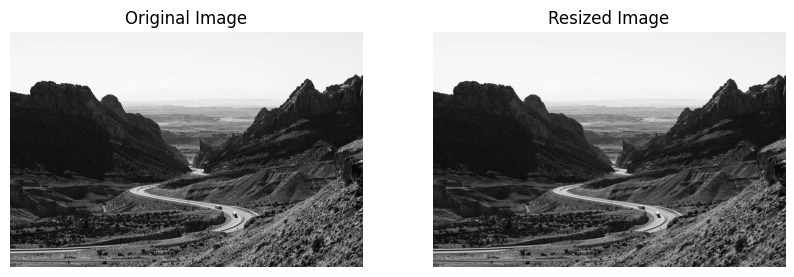

In [63]:
# Visualize the original and resized images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Resized image
plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Resized Image')
plt.axis('off')

plt.show()

Plotting Histogram of resized Image

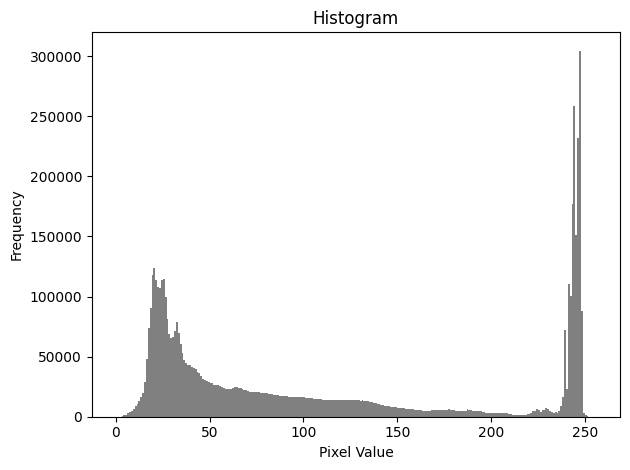

In [64]:
# Histogram of the resized image
plt.hist(resized_image.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Plotting Cumulative Histogram of resized Image

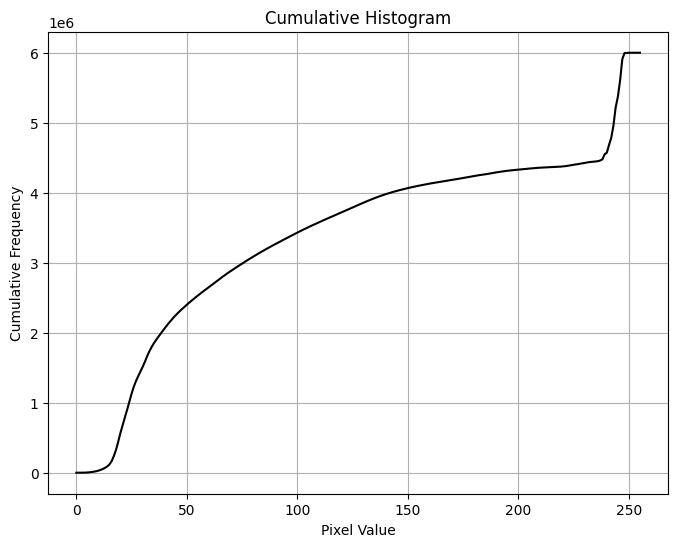

In [65]:
# Calculate histogram and cumulative distribution function
histogram, bins = np.histogram(resized_image.flatten(), 256, [0, 256])  # Compute histogram of resized image
cumulative_histogram = np.cumsum(histogram)  # Compute cumulative sum of histogram values

# Plot the cumulative histogram
plt.figure(figsize=(8, 6))  # Set figure size for the plot
plt.plot(cumulative_histogram, color='black')  # Plot cumulative histogram
plt.title('Cumulative Histogram')  # Set title of the plot
plt.xlabel('Pixel Value')  # Set label for x-axis
plt.ylabel('Cumulative Frequency')  # Set label for y-axis
plt.grid(True)  # Add grid lines for better readability
plt.show()  # Display the plot

Shifting Histogram By Value and Plot the Cumulative Histogram

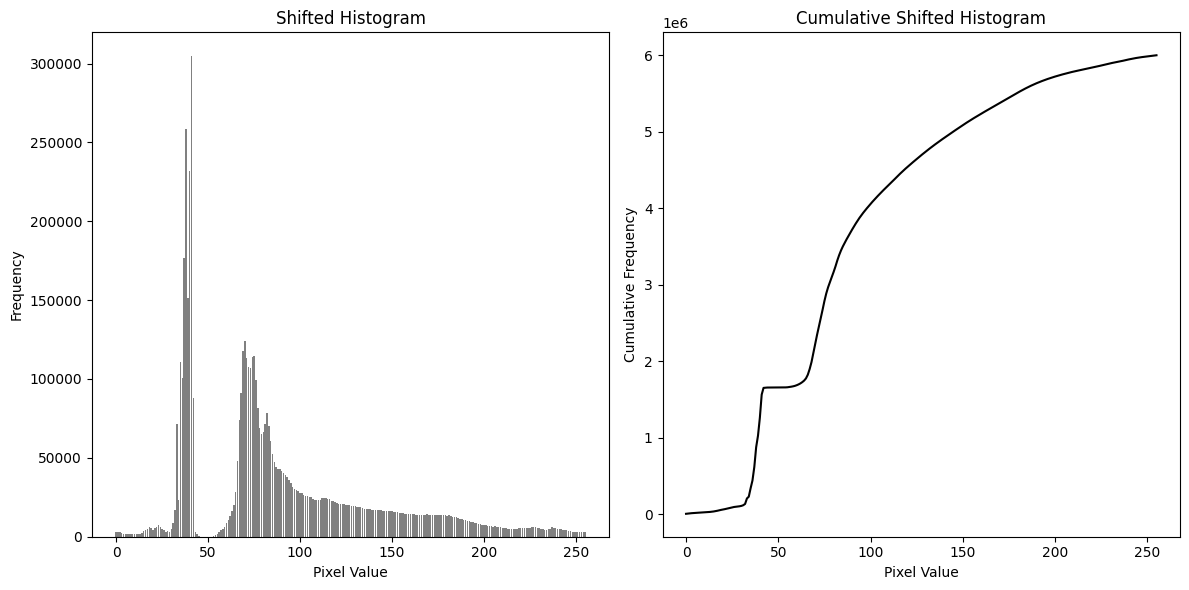

In [66]:
# Calculate histogram and cumulative distribution function
histogram, bins = np.histogram(resized_image.flatten(), 256, [0, 256])  # Compute histogram of resized image

# Define the value by which to shift the histogram
shift_value = 50

# Shift the histogram
shifted_histogram = np.roll(histogram, shift_value)  # Shift the histogram by specified value

# Calculate cumulative histogram of shifted histogram
cumulative_shifted_histogram = np.cumsum(shifted_histogram)  # Compute cumulative sum of shifted histogram

# Plot the shifted histogram
plt.figure(figsize=(12, 6))  # Set figure size for the plot
plt.subplot(1, 2, 1)  # Create subplot for the shifted histogram
plt.bar(np.arange(len(histogram)), shifted_histogram, color='gray')  # Plot the shifted histogram
plt.title('Shifted Histogram')  # Set title of the plot
plt.xlabel('Pixel Value')  # Set label for x-axis
plt.ylabel('Frequency')  # Set label for y-axis

# Plot the cumulative histogram of shifted histogram
plt.subplot(1, 2, 2)  # Create subplot for the cumulative shifted histogram
plt.plot(cumulative_shifted_histogram, color='black')  # Plot the cumulative shifted histogram
plt.title('Cumulative Shifted Histogram')  # Set title of the plot
plt.xlabel('Pixel Value')  # Set label for x-axis
plt.ylabel('Cumulative Frequency')  # Set label for y-axis

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

Applying Histogram Equalization

Histogram equalization is a technique used to enhance the contrast of an image by redistributing pixel intensities. It's particularly useful for images with poor contrast, where the pixel intensities are concentrated in a narrow range.

Histogram equalization is used for :

1 - Enhanced Contrast: Histogram equalization spreads out the intensity values over the entire dynamic range of the image. This often results in a more visually pleasing image with improved contrast, making it easier to distinguish objects and details.

2 - Brightness Correction: Images captured under different lighting conditions may have varying brightness levels. Histogram equalization can help normalize the brightness across the image, making it more consistent.

3 - Detail Enhancement: By redistributing pixel intensities, histogram equalization can bring out details that were previously hidden in shadowed or overly bright areas of the image.

4 - Preprocessing Step: Histogram equalization is often used as a preprocessing step before performing further image analysis or computer vision tasks. It can help improve the performance of algorithms by providing images with better contrast and visibility of features.

Histogram equalization is a simple yet effective technique for enhancing the visual quality of images, particularly in scenarios where the original image suffers from poor contrast or uneven lighting conditions.

1 - Plot Modified Image

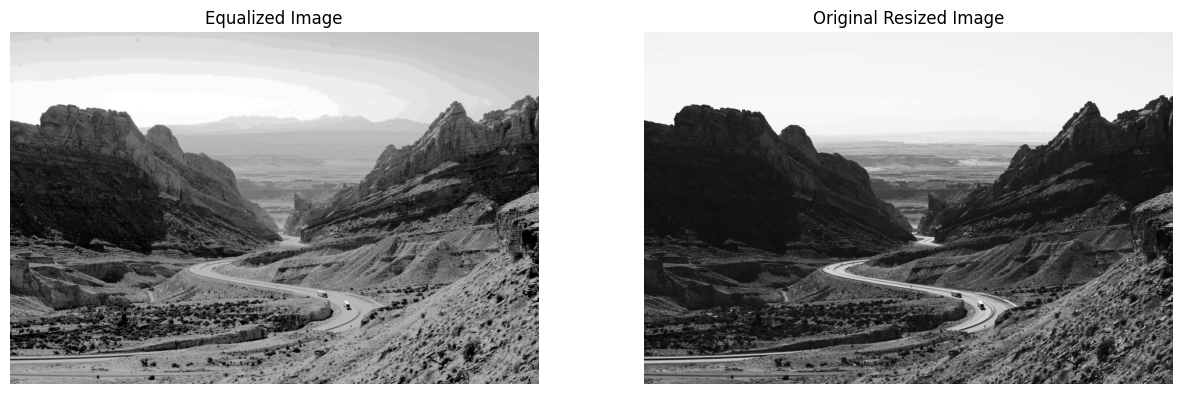

In [67]:
# Apply histogram equalization to the resized image
equalized_image = cv2.equalizeHist(resized_image)  # Apply histogram equalization


# Visualize the original and resized images
plt.figure(figsize=(15, 8))

# Equalized image
plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Resized image
plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Original Resized Image')
plt.axis('off')

plt.show()

2 - Plot Modified Image Histogram

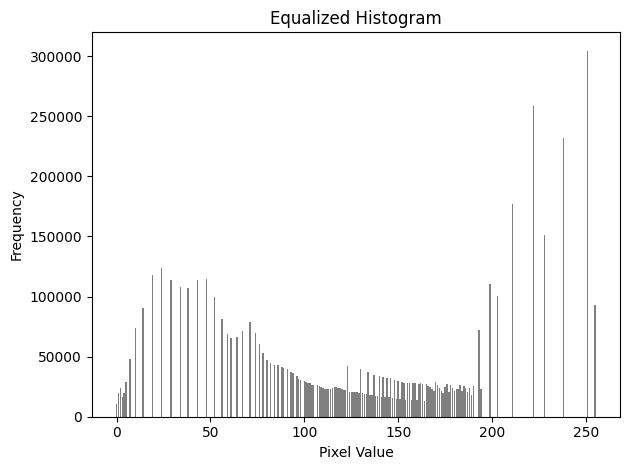

In [68]:
# Calculate histogram distribution function for equalized image
equalized_histogram, _ = np.histogram(equalized_image.flatten(), 256, [0, 256])  # Compute histogram
# Modified histogram
plt.bar(np.arange(len(equalized_histogram)), equalized_histogram, color='gray')  # Plot the modified histogram
plt.title('Equalized Histogram')  # Set title of the plot
plt.xlabel('Pixel Value')  # Set label for x-axis
plt.ylabel('Frequency')  # Set label for y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

3 - Plot Modified Image Cumulative Histogram

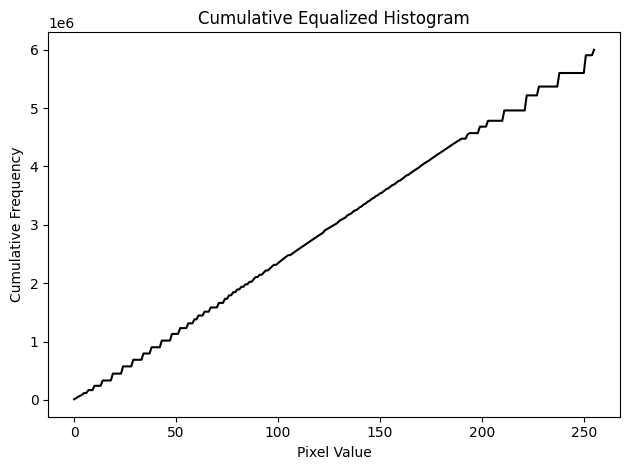

In [69]:
cumulative_equalized_histogram = np.cumsum(equalized_histogram)  # Compute cumulative sum
# Cumulative histogram of modified image
plt.plot(cumulative_equalized_histogram, color='black')  # Plot the cumulative histogram
plt.title('Cumulative Equalized Histogram')  # Set title of the plot
plt.xlabel('Pixel Value')  # Set label for x-axis
plt.ylabel('Cumulative Frequency')  # Set label for y-axis

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

Experiment TWO

Applying Contrast Stretching On Image

Contrast stretching, also known as histogram stretching or normalization, is a technique used to improve the contrast of an image by expanding the range of intensity values.
Contrast stretching is used:

1 - Enhanced Visibility of Details: Images with low contrast may appear dull and lack detail. Contrast stretching increases the difference between the darkest and lightest areas of an image, making details more visible.

2 - Improved Visual Quality: By redistributing pixel intensities over a wider range, contrast stretching can make an image look visually more appealing and natural.

3 - Correction of Underexposed or Overexposed Areas: In images where certain regions are underexposed (too dark) or overexposed (too bright), contrast stretching can help bring out details in these areas by distributing pixel values across the entire intensity range.

4 - Preprocessing for Image Analysis: In various image processing and computer vision tasks, having well-contrasted images is essential for accurate analysis and detection of features. Contrast stretching is often used as a preprocessing step to enhance image quality before performing further analysis.

5 - Subjective Preference: Sometimes, contrast stretching is applied simply to make an image look more visually appealing or to match the desired aesthetic.

contrast stretching is a simple yet effective technique for improving the visual quality and usability of images in various applications, from photography to medical imaging and beyond.








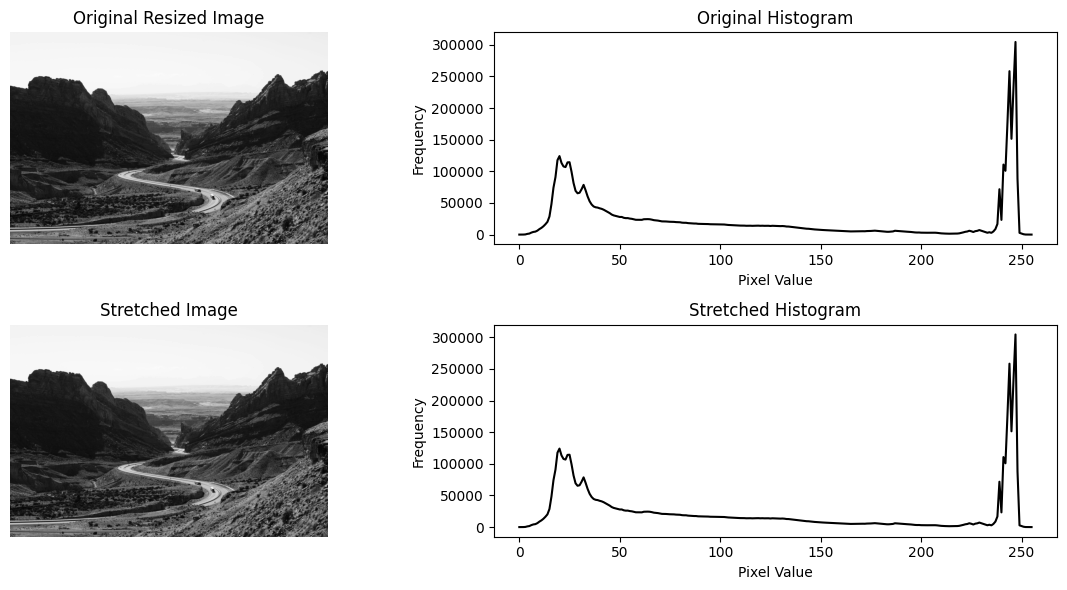

In [70]:
# Calculate histogram
histogram, bins = np.histogram(resized_image.flatten(), 256, [0, 256])  # Compute histogram of image

# Find non-zero indices in the histogram
non_zero_indices = np.nonzero(histogram)

# Deduce parameters for contrast stretching
min_intensity = np.min(non_zero_indices)  # Minimum intensity with non-zero frequency
max_intensity = np.max(non_zero_indices)  # Maximum intensity with non-zero frequency
lower_bound = min_intensity  # Lower bound for contrast stretching
upper_bound = max_intensity  # Upper bound for contrast stretching

# Apply contrast stretching
stretched_image = np.clip((resized_image - lower_bound) * (255.0 / (upper_bound - lower_bound)), 0, 255).astype(np.uint8)

# Plot original and stretched histograms
plt.figure(figsize=(12, 6))  # Set figure size for the plot

# Original resized image
plt.subplot(2, 2, 1)
plt.imshow(resized_image, cmap='gray')  # Display original image
plt.title('Original Resized Image')  # Set title of the plot
plt.axis('off')  # Turn off axis

# Plot original histogram
plt.subplot(2, 2, 2)
plt.plot(histogram, color='black')  # Plot original histogram
plt.title('Original Histogram')  # Set title of the plot
plt.xlabel('Pixel Value')  # Set label for x-axis
plt.ylabel('Frequency')  # Set label for y-axis

# Stretched image
plt.subplot(2, 2, 3)
plt.imshow(stretched_image, cmap='gray')  # Display stretched image
plt.title('Stretched Image')  # Set title of the plot
plt.axis('off')  # Turn off axis

# Plot stretched histogram
stretched_histogram, _ = np.histogram(stretched_image.flatten(), 256, [0, 256])  # Compute histogram of stretched image
plt.subplot(2, 2, 4)
plt.plot(stretched_histogram, color='black')  # Plot stretched histogram
plt.title('Stretched Histogram')  # Set title of the plot
plt.xlabel('Pixel Value')  # Set label for x-axis
plt.ylabel('Frequency')  # Set label for y-axis

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot